In [5]:
#part one: compute the jaccard similarity
#https://github.com/VipanchiKatthula/Jaccard_Cosine_Similarity/blob/master/Jaccard_and_Cosine_Similarity.ipynb
%pip install nltk

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [37]:
%pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 KB 3.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 2.4.0
    Uninstalling sentence-transformers-2.4.0:
      Successfully uninstalled sentence-transformers-2.4.0
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [20]:
#load the file
df_hsien = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_hsien.csv')
df_google = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_google.csv')
df_julia = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_4_eng_version_julia.csv')
df_hsien_5 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_hsien.csv')
df_julia_5 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_julia.csv')
df_google_5 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_google.csv')
df_hsien_6 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_hsien.csv')
df_julia_6 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_julia.csv')
df_google_6 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_google.csv')
df_hsien.columns = ['English_Verse']
df_julia.columns = ['English_Verse']
df_google.columns = ['English_Verse']
df_hsien_5.columns = ['English_Verse']
df_julia_5.columns = ['English_Verse']
df_google_5.columns = ['English_Verse']
df_hsien_6.columns = ['English_Verse']
df_julia_6.columns = ['English_Verse']
df_google_6.columns = ['English_Verse']
print(df_julia)


                                        English_Verse
0   There are, it is said, some victors who deligh...
1   See him now: walking on air after a busy day o...
2   This latest victory, however, did bring an unu...
3                  'May you die without descendants!'
4   Echoed in the cathedral of Ah-Q's mind. 'She's...
5     'Woman..."he thought. 'Must... find... woman...
6   'Sauce for the goose..." he thought some more,...
7   As to when, exactly, Ah-Q began snoring that e...
8   Irrefutable proof that women are at the root o...
9   The great majority of Chinese men in history w...
10  Until this point in his career, Ah-Q had been ...
11  Yet here he was, at the age of thirty - the ye...
12                   'Woman..' Ah-Q went on thinking.
13  Ah-Q often kept women he suspected of having d...
14  One evening, after a day spent husking rice at...
15  Once the dishes were done, Mrs Wu, the Zhaos' ...
16  'The mistress hasn't eaten for two days, becau...
17  'Woman... Mrs Wu...' Ah-

In [41]:
len(df_julia_6)

32

In [5]:
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
embedding_hsien = model.encode(df_hsien['English_Verse'].tolist(), convert_to_tensor=True)
embedding_julia = model.encode(df_julia['English_Verse'].tolist(), convert_to_tensor=True)
embedding_google = model.encode(df_google['English_Verse'].tolist(), convert_to_tensor=True)

In [6]:
similarity = []
for emb1, emb2 in zip(embedding_hsien, embedding_google):
    sim = cosine_similarity([emb1.cpu().numpy()], [emb2.cpu().numpy()])
    similarity.append(sim[0][0])  # sim is a 2D array, extract the single value

df_google['similarities'] = similarity
print(df_google['similarities'])

0     0.721246
1     0.547950
2     0.732308
3     0.509605
4     0.572176
5     0.858578
6     0.882506
7     0.725165
8     0.325309
9     0.791051
10    0.494099
11    0.769681
12    0.744533
13    0.408291
14    0.733616
15    0.735079
16    0.762181
17    0.704784
18    0.615846
19    0.847557
20    0.817830
21    0.635609
22    0.463185
23    0.868943
24    0.780983
25    0.637382
26    0.435885
27    0.610874
28    0.483146
29    0.667043
30    0.607414
31    0.441347
32    0.387002
33    0.563235
34    0.581770
35    0.579357
36    0.584060
37    0.436739
38    0.635232
39    0.702402
Name: similarities, dtype: float32


In [7]:
#comparison of whole chapter
chapt4_hsien = " ".join(df_hsien['English_Verse'])
chapt4_google = " ".join(df_google['English_Verse'])
chapt4_julia = " ".join(df_julia['English_Verse'])
print(chapt4_hsien)

There are said to be some victors who take no pleasure in a victory unless 
their opponents are as fierce as tigers or eagles: if their adversaries are as 
timid as sheep or chickens they find their triumph empty. There are other 
victors who, having carried all before them, with the enemy slain or 
surrendered, cowering in utter subjection, realize that now no foe, rival, or 
friend is left—they have only themselves, supreme, solitary, desolate, and 
forlorn. Then they find their triumph a tragedy. But our hero was not so 
spineless. He was always exultant. This may be a proof of the moral supremacy of 
China over the rest of the world. Look at Ah Q, light and elated, as if about to fly! This victory was not without strange consequences, though. For quite a time 
he seemed to be flying, and he flew into the Tutelary God's Temple, where he 
would normally have snored as soon as he lay down. This evening, however, he 
found it very difficult to close his eyes, for he felt as if there we

In [8]:
embedding_whole_hsien = model.encode(chapt4_hsien, convert_to_tensor=True)
embedding_whole_google = model.encode(chapt4_google, convert_to_tensor=True)
embedding_whole_julia = model.encode(chapt4_julia, convert_to_tensor=True)

In [10]:
similarity_whole_hsigoo = cosine_similarity([embedding_whole_hsien.cpu().numpy()], [embedding_whole_google.cpu().numpy()])
similarity_whole_gooju = cosine_similarity([embedding_whole_google.cpu().numpy()], [embedding_whole_julia.cpu().numpy()])
similarity_whole_hsiju = cosine_similarity([embedding_whole_hsien.cpu().numpy()], [embedding_whole_julia.cpu().numpy()])
print(similarity_whole_hsigoo, similarity_whole_gooju, similarity_whole_hsiju)

[[0.755978]] [[0.79731435]] [[0.8803494]]


In [11]:
#split to string to set
set_hsien_chapt4 = set(chapt4_hsien.split())
set_google_chapt4 = set(chapt4_google.split())
set_julia_chapt4 = set(chapt4_julia.split())


In [12]:
#compute jaccard similarity

#jaccard score between hsien and google
inter_hsigoo_chapt4 = set_hsien_chapt4.intersection(set_google_chapt4)
union_hsigoo_chapt4 = set_hsien_chapt4.union(set_google_chapt4)
jaccard_hsigoo_chapt4 = len(inter_hsigoo_chapt4)/len(union_hsigoo_chapt4)
print(jaccard_hsigoo_chapt4)

#jaccard score between google and yiyun
inter_gooju_chapt4 = set_google_chapt4.intersection(set_julia_chapt4)
union_gooju_chapt4 = set_google_chapt4.union(set_julia_chapt4)
jaccard_gooju_chapt4 = len(inter_gooju_chapt4)/len(union_gooju_chapt4)
print(jaccard_gooju_chapt4)

#jaccard score between yiyun and hsien
inter_hsiju_chapt4 = set_hsien_chapt4.intersection(set_julia_chapt4)
union_hsiju_chapt4 = set_hsien_chapt4.union(set_julia_chapt4)
jaccard_hsiju_chapt4 = len(inter_hsiju_chapt4)/len(union_hsiju_chapt4)
print(jaccard_hsiju_chapt4)

0.11562284927735719
0.09813983322642719
0.21129568106312294


In [21]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
%pip install scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
#Keybert - extract keyword
%pip install keybert

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
from keybert import KeyBERT
km_model = KeyBERT()

In [23]:
#extract keyword from chapter 4
df_hsien_texts = df_hsien['English_Verse'].tolist()
df_yiyun_texts = df_julia['English_Verse'].tolist()
df_google_texts = df_google['English_Verse'].tolist()
keywords = []
for text in df_hsien_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords.append(extracted_keywords)
print(keywords)


[[('victory', 0.3839), ('victors', 0.3721), ('surrendered', 0.3575), ('triumph', 0.333), ('rival', 0.3221)], [('fly', 0.4497), ('light', 0.4108), ('elated', 0.2952), ('look', 0.2642), ('ah', 0.1349)], [('nun', 0.4271), ('snored', 0.4183), ('flew', 0.3269), ('finger', 0.2598), ('victory', 0.256)], [('sonless', 0.5798), ('die', 0.2846), ('ah', 0.0955)], [('sonless', 0.2966), ('teachings', 0.2789), ('descendants', 0.2372), ('spirit', 0.2351), ('ought', 0.231)], [('woman', 0.5106), ('thought', 0.2295)], [('monk', 0.3949), ('paws', 0.369), ('woman', 0.3457), ('thought', 0.1168)], [('fingers', 0.2656), ('asleep', 0.2527), ('soft', 0.2306), ('woman', 0.1795), ('fell', 0.1681)], [('woman', 0.5084), ('menace', 0.4291), ('mankind', 0.3863)], [('shang', 0.4617), ('chinese', 0.3619), ('chan', 0.3353), ('cho', 0.3032), ('chin', 0.3024)], [('nuns', 0.4949), ('monks', 0.443), ('heretics', 0.4036), ('nun', 0.3992), ('morals', 0.3689)], [('nun', 0.51), ('odiousness', 0.3352), ('headedness', 0.2658), ('

In [13]:
keywords_google = []
for text in df_google_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_google.append(extracted_keywords)
print(keywords_google)


[[('victory', 0.4794), ('proud', 0.4192), ('winners', 0.3988), ('crowned', 0.395), ('overcome', 0.3263)], [('flying', 0.5399), ('seeing', 0.3646)], [('finger', 0.4655), ('fingers', 0.454), ('thumb', 0.4208), ('slippery', 0.3892), ('snore', 0.3022)], [('grandson', 0.4907), ('broken', 0.3516), ('son', 0.3399)], [('piety', 0.265), ('thoughts', 0.2628), ('sentence', 0.2609), ('filial', 0.2461), ('ghost', 0.2451)], [('women', 0.4972), ('thought', 0.2537)], [('monk', 0.4618), ('woman', 0.302), ('women', 0.2894), ('moves', 0.2582), ('thought', 0.1071)], [('snoring', 0.4943), ('female', 0.2953), ('slippery', 0.2796), ('fingers', 0.2515), ('fluttered', 0.2459)], [('harmful', 0.4741), ('women', 0.3903), ('know', 0.2221)], [('zhou', 0.4953), ('shang', 0.4864), ('zhuo', 0.451), ('qin', 0.4264), ('chinese', 0.3541)], [('fanny', 0.3132), ('doctrine', 0.2472), ('monk', 0.2443), ('righteousness', 0.2433), ('nun', 0.2407)], [('nun', 0.503), ('nuns', 0.4482), ('heresy', 0.3106), ('fluttering', 0.3061), 

In [13]:
keywords_yiyun = []
for text in df_yiyun_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_yiyun.append(extracted_keywords)
print(keywords_yiyun)


[[('victory', 0.4304), ('overcoming', 0.3769), ('conquest', 0.3725), ('superiority', 0.3711), ('slain', 0.3658)], [('snoring', 0.4942), ('nun', 0.4415), ('forefinger', 0.3588), ('thumb', 0.297), ('lain', 0.2796)], [('descendants', 0.4364), ('scripture', 0.4183), ('ancient', 0.3109), ('grave', 0.2777), ('dying', 0.2596)], [('woman', 0.4018), ('thought', 0.204)], [('goose', 0.5018), ('sauce', 0.3668), ('woman', 0.2876), ('thought', 0.1582)], [('snoring', 0.5754), ('asleep', 0.275), ('evening', 0.1403), ('fingertips', 0.1308), ('fell', 0.11)], [('women', 0.4279), ('evil', 0.4067), ('proof', 0.3494), ('irrefutable', 0.3482), ('root', 0.2002)], [('shang', 0.4352), ('zhou', 0.4243), ('zhuo', 0.363), ('qin', 0.3449), ('concubine', 0.3319)], [('nuns', 0.3534), ('heretics', 0.338), ('monks', 0.3303), ('nun', 0.3022), ('ordained', 0.2503)], [('confucius', 0.4579), ('nun', 0.452), ('confucian', 0.3608), ('veiled', 0.3391), ('bewitchingly', 0.3144)], [('woman', 0.5064), ('thinking', 0.38), ('ah', 

In [25]:
df_julia_chap5 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_5_eng_version_julia.csv')
df_julia_chap5.rename(columns={'English_Verse_chap5_yiyun': 'English_Verse'}, inplace=True)
df_julia_chap6 = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/data_processing/chapter_6_eng_version_julia.csv')
df_julia_chap6.rename(columns={'English_Verse_chap6_julia': 'English_Verse'}, inplace=True)
df_julia_all = pd.concat([df_julia, df_julia_chap5, df_julia_chap6], ignore_index=True)
df_julia_all

,English_Verse
0,"There are, it is said, some victors who deligh..."
1,See him now: walking on air after a busy day o...
2,"This latest victory, however, did bring an unu..."
3,'May you die without descendants!'
4,Echoed in the cathedral of Ah-Q's mind. 'She's...
...,...
94,"""We'll pay better than anyone else!' said the ..."
95,"'I want a fur waistcoat,' Mrs Zhao said."
96,"After signalling his assent, Ah-Q slouched out..."
97,But when she took her skirt to be dyed black t...


In [26]:
%pip install gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 KB 4.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import gensim
from gensim.utils import simple_preprocess

In [27]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from gensim.utils import simple_preprocess

nltk.download('stopwords')

stop_words = stopwords.words('english')
newStopWords = ['ah', 'q', 'i']
stop_words.extend(newStopWords)

def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet), deacc=True) if word not in stop_words] for tweet in tweets]

def preprocessing(df):
    df['English_Verse'] = df['English_Verse'].str.lower()  # Convert to lowercase
    df['English_Verse'] = df['English_Verse'].str.replace("[^a-zA-Z#]", " ")  # Remove punctuations
    df['English_Verse'] = df['English_Verse'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))  # Remove short words
    df['Tweet tokens'] = df['English_Verse'].apply(lambda x: remove_stopwords([x])[0])
    df['tokens_no_stop_joined'] = df['Tweet tokens'].apply(lambda x: ' '.join(x))
    return df

def retrieve_text(df):
    doc = '. '.join(df['tokens_no_stop_joined'])
    return doc

def ngrams_series_func(data, n):
    wordList = re.sub("[^\w]", " ", data).split()
    ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:10]
    return ngrams_series

     

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df_ngrams_julia = pd.DataFrame(df_julia_all)
df_ngrams_julia = preprocessing(df_ngrams_julia)
df_ngrams_julia


,English_Verse,Tweet tokens,tokens_no_stop_joined
0,"there are, said, some victors delight only vic...","[said, victors, delight, victory, worthy, adve...",said victors delight victory worthy adversarie...
1,now: walking after busy moral victory!,"[walking, busy, moral, victory]",walking busy moral victory
2,"this latest victory, however, bring unusual tw...","[latest, victory, however, bring, unusual, twi...",latest victory however bring unusual twist tai...
3,'may without descendants!',"[may, without, descendants]",may without descendants
4,echoed cathedral ah-q's mind. 'she's quite rig...,"[echoed, cathedral, mind, quite, right, though...",echoed cathedral mind quite right thought ough...
...,...,...,...
94,"""we'll better than anyone else!' said village ...","[better, anyone, else, said, village, genius, ...",better anyone else said village genius wife gl...
95,"want waistcoat,' zhao said.","[want, waistcoat, zhao, said]",want waistcoat zhao said
96,"after signalling assent, ah-q slouched indiffe...","[signalling, assent, slouched, indifferently, ...",signalling assent slouched indifferently could...
97,"when took skirt dyed black following day, spre...","[took, skirt, dyed, black, following, day, spr...",took skirt dyed black following day spread wor...


In [29]:
text = retrieve_text(df_ngrams_julia)
print(text)

said victors delight victory worthy adversaries conquest weak stupid dust ashes mouths others overcoming everything everyone path field strewn corpses slain obeisances surrendered enemy left fight friend celebrate feel desolate solitude victory weakness inexhaustible delight susceptible living proof perhaps global superiority chinese civilization. walking busy moral victory. latest victory however bring unusual twist tail eventually floated temple earth grain according well established custom immediately lain begun snoring inexplicably however particular evening difficulty keeping eyes closed something curious thumb forefinger felt softer silkier usual something nun face attached fingers face rubbed smooth. may without descendants. echoed cathedral mind quite right thought ought woman without descendants offer bowl rice grave woman need words ancient sages three ways betraying parents dying without descendants serious without descendants become hungry ghosts thinking point therefore fu

In [30]:
import re
import matplotlib.pyplot as plt


Text(0, 0.5, '')

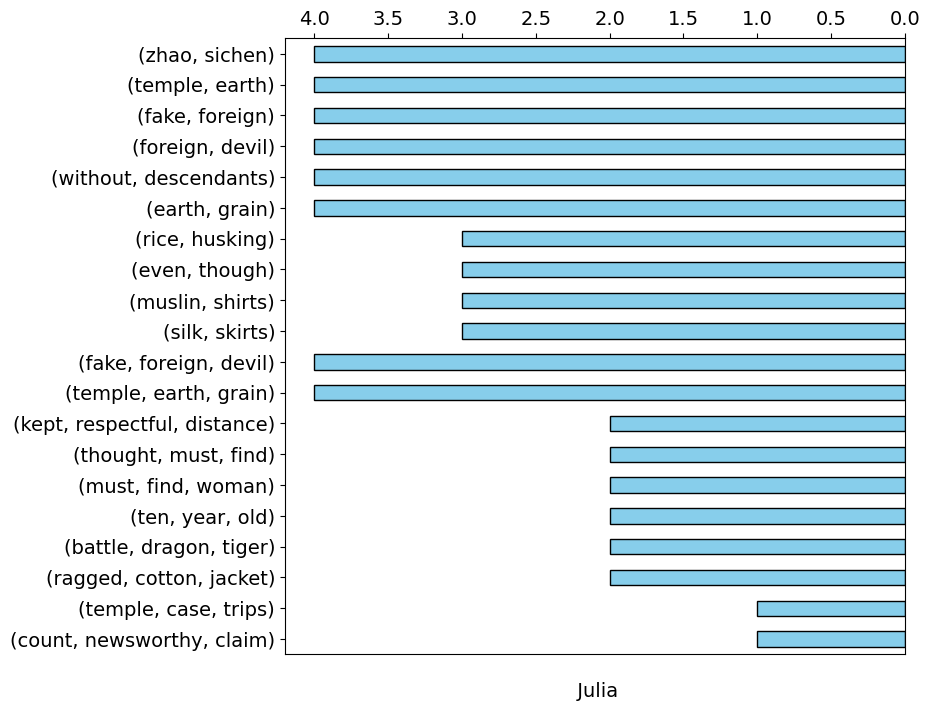

In [32]:
bigram1 = ngrams_series_func(text, 2)
trigram1 = ngrams_series_func(text, 3)



ngram1 = pd.concat([bigram1, trigram1])
barstyle = {'width': 0.5, 'edgecolor': 'black'}

plt.rcParams.update({'font.size': 14})
#fig, ax=plt.subplots(1,2, figsize=(16,8), gridspec_kw = {'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})
fig, ax=plt.subplots(1,1, figsize=(8,8))

#barh_ax = ax[0]
barh_ax = ax

ngram1[::-1].plot.barh(ax=barh_ax, color= 'skyblue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Julia')
barh_ax.set_ylabel('',fontsize=50)

In [21]:
#compare verses to verses -- chapter 4

sentence_julia = df_julia['English_Verse'].tolist()
sentence_google = df_google['English_Verse'].tolist()
sentence_hsien = df_hsien['English_Verse'].tolist()
print(sentence_hsien)







['There are said to be some victors who take no pleasure in a victory unless \r\ntheir opponents are as fierce as tigers or eagles: if their adversaries are as \r\ntimid as sheep or chickens they find their triumph empty. There are other \r\nvictors who, having carried all before them, with the enemy slain or \r\nsurrendered, cowering in utter subjection, realize that now no foe, rival, or \r\nfriend is left—they have only themselves, supreme, solitary, desolate, and \r\nforlorn. Then they find their triumph a tragedy. But our hero was not so \r\nspineless. He was always exultant. This may be a proof of the moral supremacy of \r\nChina over the rest of the world.', 'Look at Ah Q, light and elated, as if about to fly!', "This victory was not without strange consequences, though. For quite a time \r\nhe seemed to be flying, and he flew into the Tutelary God's Temple, where he \r\nwould normally have snored as soon as he lay down. This evening, however, he \r\nfound it very difficult to c

In [22]:
embed_hsien = model.encode(sentence_hsien, convert_to_tensor=True)
embed_google = model.encode(sentence_google, convert_to_tensor=True)
embed_julia = model.encode(sentence_julia, convert_to_tensor=True)

In [23]:
hsien_google_cs = []
google_julia_cs = []
hsien_julia_cs = []

for emb_hsien, emb_google, emb_julia in zip(embed_hsien, embed_google, embed_julia):
    hsien_google = cosine_similarity([emb_hsien.cpu().numpy()], [emb_google.cpu().numpy()])[0][0]
    google_julia = cosine_similarity([emb_google.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]
    hsien_julia = cosine_similarity([emb_hsien.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]

    hsien_google_cs.append(hsien_google)
    google_julia_cs.append(google_julia)
    hsien_julia_cs.append(hsien_julia)



    


In [34]:
df_chapter4 = pd.DataFrame(columns= ['Chapter', 'Paragraph', 'Hsien', 'Google Translator', 'Julia', 'Hsien - Google', 'Julia - Google', 'Hsien - Julia'])

df_chapter5 = pd.DataFrame(columns= ['Chapter', 'Paragraph', 'Hsien', 'Google Translator', 'Julia', 'Hsien - Google', 'Julia - Google', 'Hsien - Julia'])

df_chapter6 = pd.DataFrame(columns= ['Chapter', 'Paragraph', 'Hsien', 'Google Translator', 'Julia', 'Hsien - Google', 'Julia - Google', 'Hsien - Julia'])

In [32]:
#put all information into the dataframe
Paragraph = 0
for i in range(0,40):
    Chapter = 4
    Paragraph += 1
    Hsien_text = sentence_hsien[i]
    Google_text = sentence_google[i]
    Julia_text = sentence_julia[i]

    new_row = pd.DataFrame({'Chapter': [Chapter], 
                            'Paragraph': [Paragraph], 
                            'Hsien': [Hsien_text], 
                            'Google Translator': [Google_text], 
                            'Julia': [Julia_text],
                            'Hsien - Google': [hsien_google_cs[i]],
                            'Julia - Google': [google_julia_cs[i]],
                            'Hsien - Julia' : [hsien_julia_cs[i]]})
    df_chapter4 = pd.concat([df_chapter4, new_row], ignore_index=True)

df_chapter4
    


/var/folders/c6/x83g8r650s9033gx_jgr7dsr0000gn/T/ipykernel_20820/3298399923.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_chapter4 = pd.concat([df_chapter4, new_row], ignore_index=True)


,Chapter,Paragraph,Hsien,Google Translator,Julia,Hsien - Google,Julia - Google,Hsien - Julia
0,4,1,There are said to be some victors who take no ...,SOME people say: some winners are Willing to b...,"There are, it is said, some victors who deligh...",0.721246,0.746372,0.783598
1,4,2,"Look at Ah Q, light and elated, as if about to...","Seeing, he seemed to be flying!",See him now: walking on air after a busy day o...,0.547950,0.426692,0.383866
2,4,3,This victory was not without strange consequen...,"However, This Victory Made Him a Little Strang...","This latest victory, however, did bring an unu...",0.732308,0.724682,0.865143
3,4,4,"""Ah Q, may you die sonless!""","""Broken Son's Grandson!""",'May you die without descendants!',0.509605,0.451231,0.617101
4,4,5,"These words sounded again in Ah Q's ears, and ...","This sense was heard agin in aqi's elegt: yes,...",Echoed in the cathedral of Ah-Q's mind. 'She's...,0.572176,0.622151,0.838266
5,4,6,"""Woman, woman! "" he thought.","""WOMAN, WOMAN! ..."" he think.","'Woman...""he thought. 'Must... find... woman...",0.858578,0.686962,0.681657
6,4,7,""". . . The monk paws. . . . Woman, woman! . . ...","""... The Monk Moved ... Woman, WOMAN! ... Woma...","'Sauce for the goose..."" he thought some more,...",0.882506,0.505758,0.502814
7,4,8,We shall never know when Ah Q finally fell asl...,We cannot know when aq is snoring this night.b...,"As to when, exactly, Ah-Q began snoring that e...",0.725165,0.726298,0.726452
8,4,9,From this we can see that woman is a menace to...,"That is, we can knowing that situation are har...",Irrefutable proof that women are at the root o...,0.325309,0.129296,0.681780
9,4,10,The majority of Chinese men could become saint...,"MOST CHINESE MEN COLD HAVE Been Sages, But Uni...",The great majority of Chinese men in history w...,0.791051,0.758103,0.869495


In [39]:
#chapter 5

sentence_julia_5 = df_julia_5['English_Verse'].tolist()
sentence_google_5 = df_google_5['English_Verse'].tolist()
sentence_hsien_5 = df_hsien_5['English_Verse'].tolist()

embed_hsien_5 = model.encode(sentence_hsien_5, convert_to_tensor=True)
embed_google_5 = model.encode(sentence_google_5, convert_to_tensor=True)
embed_julia_5 = model.encode(sentence_julia_5, convert_to_tensor=True)


hsien_google_cs_5 = []
google_julia_cs_5 = []
hsien_julia_cs_5 = []

for emb_hsien, emb_google, emb_julia in zip(embed_hsien_5, embed_google_5, embed_julia_5):
    hsien_google = cosine_similarity([emb_hsien.cpu().numpy()], [emb_google.cpu().numpy()])[0][0]
    google_julia = cosine_similarity([emb_google.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]
    hsien_julia = cosine_similarity([emb_hsien.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]

    hsien_google_cs_5.append(hsien_google)
    google_julia_cs_5.append(google_julia)
    hsien_julia_cs_5.append(hsien_julia)


Paragraph = 0
for i in range(0,26):
    Chapter = 5
    Paragraph += 1
    Hsien_text = sentence_hsien_5[i]
    Google_text = sentence_google_5[i]
    Julia_text = sentence_julia_5[i]

    new_row = pd.DataFrame({'Chapter': [Chapter], 
                            'Paragraph': [Paragraph], 
                            'Hsien': [Hsien_text], 
                            'Google Translator': [Google_text], 
                            'Julia': [Julia_text],
                            'Hsien - Google': [hsien_google_cs_5[i]],
                            'Julia - Google': [google_julia_cs_5[i]],
                            'Hsien - Julia' : [hsien_julia_cs_5[i]]})
    df_chapter5 = pd.concat([df_chapter5, new_row], ignore_index=True)

df_chapter5


,Chapter,Paragraph,Hsien,Google Translator,Julia,Hsien - Google,Julia - Google,Hsien - Julia
0,5,1,After Ah Q had kowtowed and complied with the ...,"After Ayei, he still returned to Tugu Temple. ...",By the time Ah-Q – his dues paid – made his wa...,0.608267,0.616390,0.823859
1,5,2,After getting up he loafed about the streets a...,"After he got up, he still strolled on the stre...","Once up, he set out to wander the streets, as ...",0.827789,0.814232,0.826920
2,5,3,"A good many days later, however, he felt even ...","But he felt a little weird in the world, but i...","It took a little while longer, however, for th...",0.495885,0.502677,0.832632
3,5,4,When Ah Q could stand it no longer he went to ...,"Aq couldn't bear it anymore, he had to go to t...","When he could stand it no longer, Ah-Q was obl...",0.555941,0.648623,0.724759
4,5,5,"Ah Q found it more and more extraordinary. ""Th...",The more Aq feels strange.He thought that thes...,"Most extraordinary, pondered Ah-Q. Families th...",0.689983,0.605896,0.777356
...,...,...,...,...,...,...,...,...
73,5,22,"""Now—aren't you?"" said the old nun, pointing a...","""Now ... isn't this?"" Lao Ni pointed at his po...","‘What’s that under there, then?’ The old nun i...",0.477666,0.360142,0.617103
74,5,23,"""Are these yours? Can you make them answer you...","""Is this yours? Can you call him promise you? ...","‘Reckon they’re yours, do you? Do they answer ...",0.627062,0.649968,0.681416
75,5,24,"Leaving his sentence unfinished, Ah Q took to ...","Aqi didn't finish talking, and ran away; he ch...","Ah-Q broke into a run, pursued by a sizeable b...",0.788345,0.701012,0.916643
76,5,25,Fearing that the nun would let the black dog o...,Ah was afraid that Nuni would release the blac...,"Afraid the dog might be set loose on him, Ah-Q...",0.762092,0.762082,0.862256


In [42]:
#chapter 6
sentence_julia_6 = df_julia_6['English_Verse'].tolist()
sentence_google_6 = df_google_6['English_Verse'].tolist()
sentence_hsien_6 = df_hsien_6['English_Verse'].tolist()

embed_hsien_6 = model.encode(sentence_hsien_6, convert_to_tensor=True)
embed_google_6 = model.encode(sentence_google_6, convert_to_tensor=True)
embed_julia_6 = model.encode(sentence_julia_6, convert_to_tensor=True)


hsien_google_cs_6 = []
google_julia_cs_6 = []
hsien_julia_cs_6 = []

for emb_hsien, emb_google, emb_julia in zip(embed_hsien_6, embed_google_6, embed_julia_6):
    hsien_google = cosine_similarity([emb_hsien.cpu().numpy()], [emb_google.cpu().numpy()])[0][0]
    google_julia = cosine_similarity([emb_google.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]
    hsien_julia = cosine_similarity([emb_hsien.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]

    hsien_google_cs_6.append(hsien_google)
    google_julia_cs_6.append(google_julia)
    hsien_julia_cs_6.append(hsien_julia)


Paragraph = 0
for i in range(0,32):
    Chapter = 6
    Paragraph += 1
    Hsien_text = sentence_hsien_6[i]
    Google_text = sentence_google_6[i]
    Julia_text = sentence_julia_6[i]

    new_row = pd.DataFrame({'Chapter': [Chapter], 
                            'Paragraph': [Paragraph], 
                            'Hsien': [Hsien_text], 
                            'Google Translator': [Google_text], 
                            'Julia': [Julia_text],
                            'Hsien - Google': [hsien_google_cs_6[i]],
                            'Julia - Google': [google_julia_cs_6[i]],
                            'Hsien - Julia' : [hsien_julia_cs_6[i]]})
    df_chapter6 = pd.concat([df_chapter6, new_row], ignore_index=True)

df_chapter6

/var/folders/c6/x83g8r650s9033gx_jgr7dsr0000gn/T/ipykernel_20820/4194081734.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_chapter6 = pd.concat([df_chapter6, new_row], ignore_index=True)


,Chapter,Paragraph,Hsien,Google Translator,Julia,Hsien - Google,Julia - Google,Hsien - Julia
0,6,1,Weichuang did not see Ah Q again till just aft...,"When I saw Aqi's appearance again, it was just...",Weizhuang did not catch another glimpse of Ah-...,0.630503,0.605435,0.846766
1,6,2,Ah Q's return this time was very different fro...,But Aq's return this time is very different fr...,Yet Ah-Q seemed changed - even remarkably so -...,0.786052,0.764165,0.873803
2,6,3,"""Hullo, Ah Q, so you're back!""","""Open, Ah, you are back!""","'Well, Ah-Q,' the manager began, nodding at hi...",0.652488,0.365499,0.496418
3,6,4,"""Yes, I'm back.""","""came back.""",'Reckon so.',0.790898,0.298275,0.282619
4,6,5,"""You've made money . . . er . . . where. . .?""","""Fortune to get rich, you are -in ...""","'Made a pile, I see... in...?'",0.542642,0.307741,0.423911
5,6,6,"""I went to town.""","""Go to the city!""",'In town!',0.648282,0.562020,0.647980
6,6,7,By the next day this piece of news had spread ...,This news spread all over the next day.Everyon...,"By the following day, the news had spread thro...",0.592480,0.629270,0.841563
7,6,8,"According to Ah Q, he had been a servant in th...","According to Aqi, he was helping the master's ...","As Ah-Q told it, he had started out helping in...",0.619220,0.652841,0.779613
8,6,9,"According to Ah Q, his return was also due to ...","According to Aqi, his return seems to be dissa...","As Ah-Q told it, he had come back because the ...",0.522390,0.432148,0.815399
9,6,10,"""Have you seen an execution?"" asked Ah Q. ""Ah,...","""Have you ever seen the killing head?"" Ai said...","'Ever seen an execution?' asked Ah-Q. 'Now, th...",0.610131,0.645409,0.898964
